# Automatic Differentiation (AD)

* Flux's AD can can give you the gradients for any julia function that is differentiable.
* Code excerpts below modified from PR by @dhairyagandhi96: https://github.com/FluxML/model-zoo/pull/77

In [1]:
using Plots

using Flux, Flux.Tracker
using Flux.Tracker: gradient, data

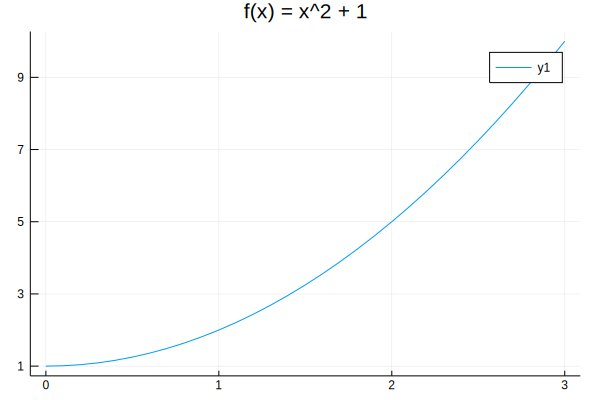

In [2]:
# You probably learned to take derivatives in school. We start with a simple
# mathematical function like:

f(x) = x^2 + 1

X_train = collect(0:.1:3)
y_train = f.(X_train)

plot(X_train, y_train, title="f(x) = x^2 + 1", yticks=1:2:9)

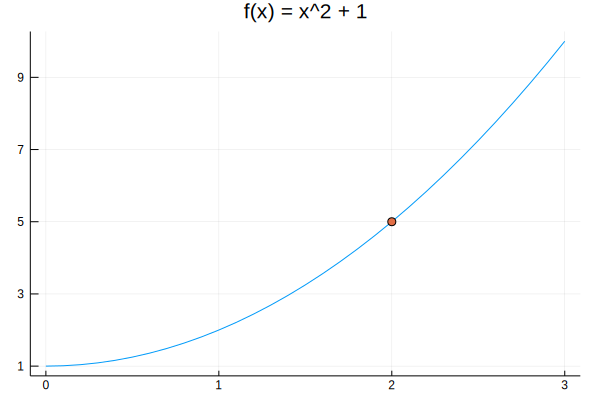

In [3]:
# pick a point on the line:

x1 = 2
y1 = f(x1)

plot(X_train, y_train, title="f(x) = x^2 + 1", yticks=1:2:9)
scatter!((x1, y1), leg=false)

The `gradient` function takes another Julia function f and a set of arguments, 
and returns the gradient with respect to each argument.

https://fluxml.ai/Flux.jl/stable/models/basics/

The `data` function extracts just the numeric value from a tracked array.

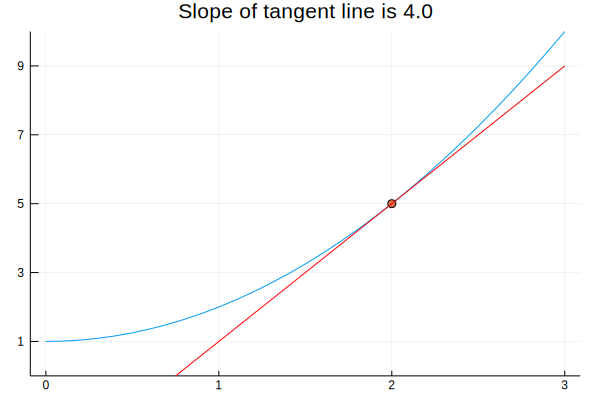

In [4]:
m = data(gradient(f, 2)[1])

# using point-slope formula.
# y - y1 = m*(x - x1)
g(x) = m*(x - x1) + y1



plot(X_train, y_train, title="f(x) = x^2 + 1", yticks=1:2:9)
scatter!((x1, y1), leg=false)
plot!(X_train, g.(X_train), color=:red, ylim=(0, 10), label="y = $m*(x - $x1) + $y1", title="Slope of tangent line is $m", yticks=1:2:9)

In [5]:
# Flux's AD can handle any Julia code you throw at it, including loops,
# recursion and custom layers, so long as the mathematical functions you call
# are differentiable. For example, we can differentiate a Taylor approximation
# to the `sin` function.

mysin(x) = sum((-1)^k*x^(1+2k)/factorial(1+2k) for k in 0:5)

x = 0.5

mysin(x), gradient(mysin, x)

(0.4794255386041834, (0.8775825618898637 (tracked),))

In [6]:
# You can see that the derivative we calculated is very close to `cos(x)`, as we
# expect.

sin(x), cos(x)

(0.479425538604203, 0.8775825618903728)